In [77]:
'''This notebook shows portfolio optimization, based on previous analysis'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
aapl = pd.read_csv('AAPL_CLOSE', index_col='Date', parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE', index_col='Date', parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE', index_col='Date', parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE', index_col='Date', parse_dates=True)

In [6]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis =1)
stocks.columns = ['aapl', 'cisco', 'ibm', 'amzn']

In [7]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [8]:
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [9]:
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [10]:
#Now using log returns instead of arithmetic return - helpful for detrending

In [11]:
#Arith mean
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [12]:
#log returns 
log_ret = np.log(stocks/stocks.shift(1))

In [13]:
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ae61550>,
      dtype=object)

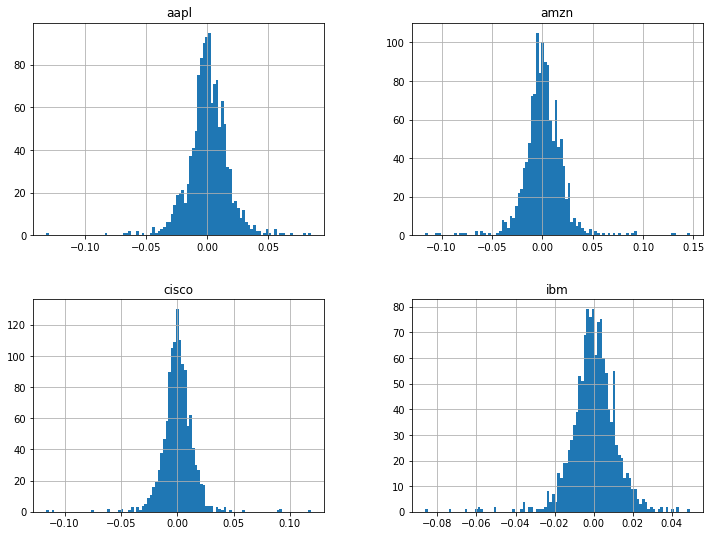

In [17]:
log_ret.hist(bins = 100, figsize=(12,9))

In [18]:
#Log mean
log_ret.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [19]:
#Covariance
log_ret.cov()

,aapl,cisco,ibm,amzn
aapl,0.000271,0.000071,0.000057,0.000075
cisco,0.000071,0.000204,0.000072,0.000079
ibm,0.000057,0.000072,0.000140,0.000059
amzn,0.000075,0.000079,0.000059,0.000375


In [20]:
#Covariance by business day x 252
log_ret.cov()*252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [32]:
#Below is commented out b/c we will get thousands of print statements. I then copy and past and remove prints
'''np.random.seed(101)
print(stocks.columns)

weights = np.array(np.random.random(4))

print('Random weights:')
print(weights)

#To ensure they all add up to 1.0

print('Rebalanced weights:')
weights = weights/np.sum(weights)
print(weights)

#Expected return
print('Expected portfolio return:')
exp_ret = np.sum((log_ret.mean() * weights) * 252)
print(exp_ret)

#Expected variance
print('Expected volatolity:')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
print(exp_vol)

#Sharpe ratio
SR = exp_ret/exp_vol

print(SR)
'''

SyntaxError: invalid syntax (<ipython-input-32-69a100865360>, line 1)

In [31]:
#Now we run this thousands of times!
#This is run 5000 times and takes a little while!

In [34]:
np.random.seed(101)

num_portfolios = 5000

all_weights = np.zeros((num_portfolios,len(stocks.columns)))
ret_array = np.zeros(num_portfolios)
vol_array = np.zeros(num_portfolios)
sharpe_array = np.zeros(num_portfolios)

for index in range(num_portfolios):

    #Weights

    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    #Save weights
    
    all_weights[index,:] = weights

    #Expected return

    ret_array[index] = np.sum((log_ret.mean() * weights) * 252)


    #Expected variance

    vol_array[index] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))


    #Sharpe ratio
    sharpe_array[index] = ret_array[index]/vol_array[index]


In [36]:
#This takes a while to generate
sharpe_array.max()

1.0303260551271067

In [39]:
sharpe_array.argmax()

1420

In [42]:
#Shows weights for each stock
all_weights[1420,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

Text(0, 0.5, 'Returns')

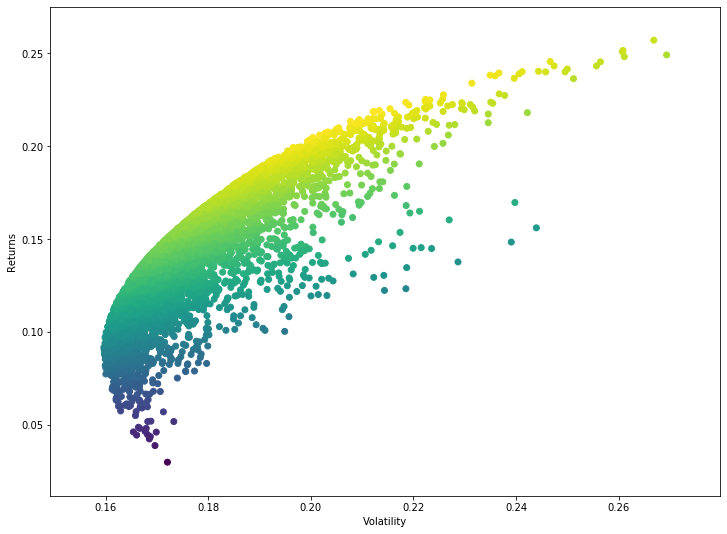

In [83]:
#Now we can make bullet plot
plt.figure(figsize=(12,9))
plt.scatter(vol_array,ret_array,c=sharpe_array)
plt.xlabel('Volatility')
plt.ylabel('Returns')
#plt.colorbar(label='Sharpe Ratio')

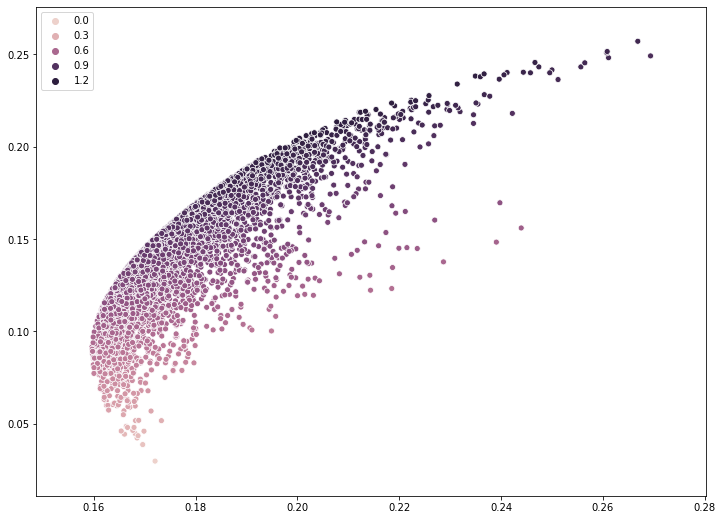

In [80]:
#In Seaborn
plt.figure(figsize=(12,9))
sns.scatterplot(x=vol_array, y=ret_array, hue = sharpe_array)

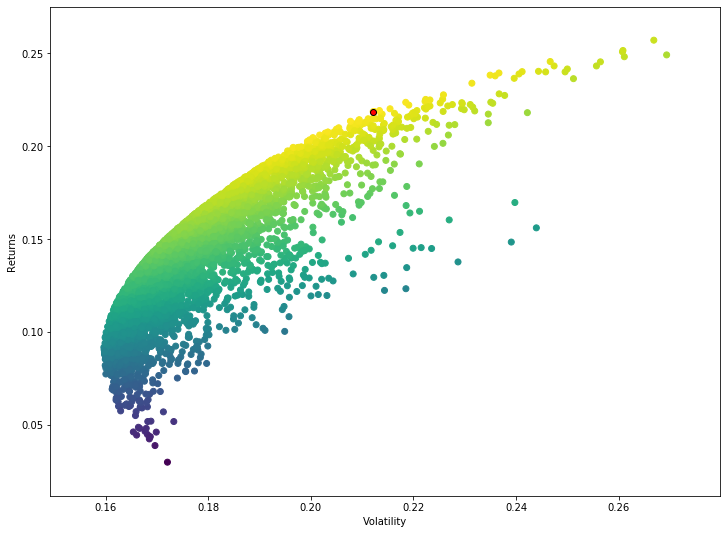

In [86]:
#Now to find maxima
max_sr_ret = ret_array[1420]
max_sr_vol = vol_array[1420]

#Now we can make bullet plot
plt.figure(figsize=(12,9))
plt.scatter(vol_array,ret_array,c=sharpe_array)
plt.xlabel('Volatility')
plt.ylabel('Returns')
#plt.colorbar(label='Sharpe Ratio')

#This plots the maximum!
plt.scatter(max_sr_vol,max_sr_ret, c='red', edgecolors='black')

In [104]:
#Define optimization function
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum((log_ret.mean() * weights) * 252)
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [105]:
#Import scipy
from scipy.optimize import minimize

In [106]:
#Define helper functions - minimize negative sharpe (maximise)
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [107]:
#Define constraints
def check_sum(weights):
    #return 0 if weight sums =1
    return np.sum(weights) -1

In [108]:
constraints = ({'type':'eq', 'fun':check_sum})

In [109]:
bounds = ((0,1),(0,1),(0,1),(0,1))

In [110]:
init_guess = [0.25, 0.25, 0.25, 0.25]

In [113]:
#Optimization algorithm
opt_results = minimize(neg_sharpe, init_guess, method = 'SLSQP',bounds = bounds, constraints=constraints )

In [114]:
opt_results

     fun: -1.0307168703352783
     jac: array([ 5.64306974e-05,  4.18573618e-05,  3.39921743e-01, -4.44799662e-05])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.26628977, 0.20418983, 0.        , 0.52952041])

In [115]:
opt_results.x

array([0.26628977, 0.20418983, 0.        , 0.52952041])

In [116]:
#This generates daily returns, volatility and sharpe ratio!
get_ret_vol_sr(opt_results.x)

array([0.21885915, 0.21233683, 1.03071687])

In [117]:
#Check efficient frontier

In [118]:
frontier_y = np.linspace(0,0.3,100)

In [120]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [124]:
frontier_volatility=[]

for possible_return in frontier_y:
    constraints_f = ({'type':'eq', 'fun':check_sum},
                  {'type':'eq', 'fun':lambda w: get_ret_vol_sr(w)[0]-possible_return})
    result = minimize(minimize_volatility, init_guess, method = 'SLSQP',bounds = bounds, constraints=constraints_f)
    
    frontier_volatility.append(result['fun'])

In [125]:
#Above takes a while

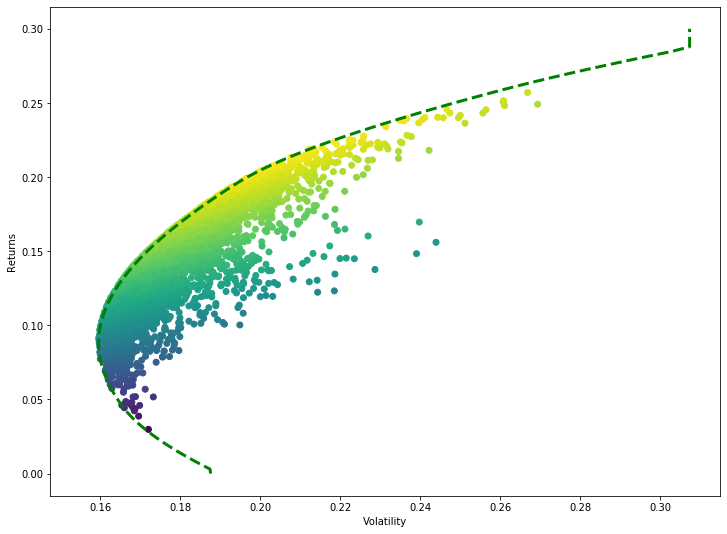

In [128]:
#Now we can re-make bullet plot
plt.figure(figsize=(12,9))
plt.scatter(vol_array,ret_array,c=sharpe_array)
plt.xlabel('Volatility')
plt.ylabel('Returns')
#plt.colorbar(label='Sharpe Ratio')

#Plot frontier volatility

plt.plot(frontier_volatility,frontier_y, 'g--', lw=3 )

In [ ]:
#This shows for each desired level of volatility, what is maximum expected return
#I.e. if someone comes up and says "i only want volatiltiy of 0.22"
#Can read off froniter line to max returns of 23% (based on past data)